In [1]:
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(1024)  # ensure same noise for each run

n = 50
x = np.random.rand(n,1)

d = x*x + 0.4*np.sin(1.5*np.pi*x) +0.04*np.random.randn(n,1)

plt.plot(x,d,'bo')
plt.xlabel('x')
plt.ylabel('d')
plt.title('Measured Data with Noise')
plt.show()


<Figure size 640x480 with 1 Axes>

Sigma =  0.04


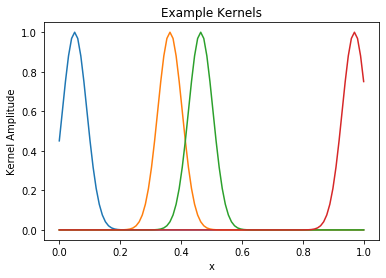

In [2]:
sigma = 0.04 #defines Gaussian kernel width
p = 100 #number of points on x-axis

# Display examples of the kernels
x_test = np.linspace(0,1.00,p)  # uniformly sample interval [0,1]
j_list = [5, 36, 46, 96]  #list of indices for example kernels 

Kdisplay = np.zeros((p,len(j_list)),dtype=float)

for i in range(p):
    for j in range(len(j_list)):
        Kdisplay[i,j]= np.exp(-(x_test[i]-x_test[j_list[j]])**2/(2*sigma**2))

print('Sigma = ',sigma)
plt.plot(x_test,Kdisplay)
plt.title('Example Kernels')
plt.xlabel('x')
plt.ylabel('Kernel Amplitude')
plt.show()

In [3]:
# Kernel fitting to data

lam = 0.01 #ridge regression parameter

distsq=np.zeros((n,n),dtype=float)
for i in range(0,n):
    for j in range(0,n):
        distsq[i,j]=(x[i]-x[j])**2
        
K = np.exp(-distsq/(2*sigma**2))

alpha = np.linalg.inv(K+lam*np.identity(n))@d


Sigma =  0.04
Lambda =  0.01


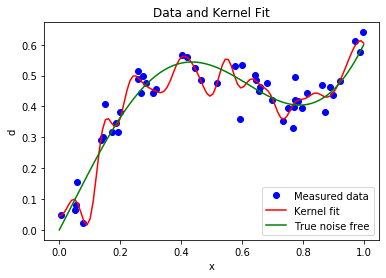

In [4]:
# Generate smooth curve corresponding to data fit

distsq_xtest = np.zeros((p,n),dtype=float)
for i in range(0,p):
    for j in range(0,n):
        distsq_xtest[i,j] = (x_test[i]-x[j])**2
        
dtest = np.exp(-distsq_xtest/(2*sigma**2))@alpha

dtrue = x_test*x_test + 0.4*np.sin(1.5*np.pi*x_test)  # noise free data for comparison

print('Sigma = ',sigma)
print('Lambda = ',lam)
plt.plot(x,d,'bo',label='Measured data')
plt.plot(x_test,dtest,'r',label='Kernel fit')
plt.plot(x_test,dtrue,'g',label='True noise free')
plt.title('Data and Kernel Fit')
plt.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('d')
plt.show()
